In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 



In [3]:
file_userdata = 'user_data.csv'
df_user = pd.read_csv(file_userdata)
df_user.info()
df_user.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_id              40 non-null     int64  
 1   Ages                 40 non-null     int64  
 2   Gender               40 non-null     object 
 3   Height               40 non-null     float64
 4   Weight               40 non-null     float64
 5   Bmi                  40 non-null     float64
 6   Disease_Type         40 non-null     object 
 7   Activity_Level       40 non-null     object 
 8   Daily_Calorie        40 non-null     int64  
 9   Food_Recommendation  40 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 3.3+ KB


,User_id,Ages,Gender,Height,Weight,Bmi,Disease_Type,Activity_Level,Daily_Calorie,Food_Recommendation
0,1,62,ชาย,170.0,85.0,29.4,โรคเบาหวาน,ปานกลาง,1427,น้ำตาลต่ำ
1,2,68,หญิง,155.0,60.0,25.0,โรคความดันโลหิตสูง,น้อย,1081,โซเดียมต่ำ
2,3,61,ชาย,164.0,58.1,21.6,ไม่มีโรค,ปานกลาง,1039,สมดุล
3,4,75,ชาย,152.0,86.8,37.6,โรคความดันโลหิตสูง,น้อย,1314,โซเดียมต่ำ
4,5,70,ชาย,165.0,52.0,19.1,โรคหัวใจ,มาก,794,ไขมันต่ำ
5,6,68,หญิง,170.0,65.0,22.5,โรคหัวใจ,น้อย,1156,ไขมันต่ำ
6,7,65,หญิง,155.0,47.9,19.9,ไม่มีโรค,มาก,884,สมดุล
7,8,72,หญิง,154.1,83.0,35.0,โรคความดันโลหิตสูง,มาก,1164,โซเดียมต่ำ
8,9,69,ชาย,151.0,50.2,22.0,โรคหัวใจ,ปานกลาง,781,ไขมันต่ำ
9,10,74,หญิง,171.0,69.4,23.7,โรคความดันโลหิตสูง,น้อย,1161,โซเดียมต่ำ


In [4]:
file_fooddata = 'food_data.csv'
df_food = pd.read_csv(file_fooddata)
df_food.info()
df_food.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Food_id                   150 non-null    int64  
 1   Food_Name                 150 non-null    object 
 2   ปริมาณ                    150 non-null    object 
 3   Category                  150 non-null    object 
 4   Energy (kcal)             150 non-null    int64  
 5   Protein (g)               150 non-null    float64
 6   Carbohydrates (g)         150 non-null    float64
 7   Sugars (g)                150 non-null    float64
 8   Fat (g)                   150 non-null    float64
 9   Sodium (mg)               150 non-null    float64
 10  Food_Type                 150 non-null    object 
 11  Suitable For Disease      150 non-null    object 
 12  Food Type Not suitable    59 non-null     object 
 13  Not suitable for disease  59 non-null     object 
dtypes: float64

,Food_id,Food_Name,ปริมาณ,Category,Energy (kcal),Protein (g),Carbohydrates (g),Sugars (g),Fat (g),Sodium (mg),Food_Type,Suitable For Disease,Food Type Not suitable,Not suitable for disease
0,1,กล้วยไข่,100 g,ผลไม้,107,1.35,24.30,21.50,0.11,22.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
1,2,กล้วยน้ำว้า,100 g,ผลไม้,118,0.78,27.18,18.47,0.15,4.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
2,3,แก้วมังกร,100 g,ผลไม้,56,1.30,10.30,9.30,0.70,4.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
3,4,ขนุน,100 g,ผลไม้,101,1.55,21.73,19.17,0.42,26.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
4,5,แคนตาลูป,100 g,ผลไม้,28,0.50,5.70,10.00,0.10,6.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
5,6,ฝรั่ง,100 g,ผลไม้,68,2.60,14.00,9.00,1.00,2.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
6,7,เงาะ,100 g,ผลไม้,77,0.97,17.92,0.00,0.14,14.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
7,8,ชมพู่,100 g,ผลไม้,31,0.46,6.74,0.00,0.04,66.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
8,9,แตงโม,100 g,ผลไม้,37,0.81,8.07,8.15,0.07,4.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,ดัชนีน้ำตาลสูง,โรคเบาหวาน
9,10,ทุเรียน,100 g,ผลไม้,140,2.26,23.81,14.75,3.34,11.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN


In [5]:
print("-----------ข้อมูลผู้ใช้-----------")
print(df_user.Gender.unique())
print(df_user.Disease_Type.unique())
print(df_user.Activity_Level.unique())
print(df_user.Food_Recommendation.unique())


print("-----------ข้อมูลอาหาร-----------")
print(df_food.Category.unique())
print(df_food.Food_Type.unique())

-----------ข้อมูลผู้ใช้-----------
['ชาย' 'หญิง']
['โรคเบาหวาน' 'โรคความดันโลหิตสูง' 'ไม่มีโรค' 'โรคหัวใจ']
['ปานกลาง' 'น้อย' 'มาก']
['น้ำตาลต่ำ' 'โซเดียมต่ำ' 'สมดุล' 'ไขมันต่ำ']
-----------ข้อมูลอาหาร-----------
['ผลไม้' 'เครื่องดื่ม' 'ฟาสต์ฟู้ด' 'ขนม' 'อาหารจานหลัก']
['สมดุล' 'น้ำตาลต่ำ' 'ไขมันต่ำ' 'โซเดียมต่ำ']


In [6]:
df_user['Gender'] = df_user.Gender.replace(['ชาย','หญิง'],[1,2])
df_user['Disease_Type'] = df_user.Disease_Type.replace(['ไม่มีโรค','โรคเบาหวาน','โรคความดันโลหิตสูง','โรคหัวใจ'],[0,1,2,3])
df_user['Activity_Level'] = df_user.Activity_Level.replace(['น้อย','ปานกลาง','มาก'],[1,2,3])
df_user['Food_Recommendation'] = df_user.Food_Recommendation.replace(['สมดุล','น้ำตาลต่ำ','โซเดียมต่ำ','ไขมันต่ำ'],[0,1,2,3])



# df_food['Category'] = df_food.Category.replace(['ผลไม้', 'เครื่องดื่ม' ,'ฟาสต์ฟู้ด' ,'ขนม' ,'อาหารจานหลัก'],[0,1,2,3,4])
df_food['Food_Type'] = df_food.Food_Type.replace(['สมดุล','น้ำตาลต่ำ','โซเดียมต่ำ','ไขมันต่ำ'],[0,1,2,3])

C:\Users\User\AppData\Local\Temp\ipykernel_2840\3422500823.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Gender'] = df_user.Gender.replace(['ชาย','หญิง'],[1,2])
C:\Users\User\AppData\Local\Temp\ipykernel_2840\3422500823.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Disease_Type'] = df_user.Disease_Type.replace(['ไม่มีโรค','โรคเบาหวาน','โรคความดันโลหิตสูง','โรคหัวใจ'],[0,1,2,3])
C:\Users\User\AppData\Local\Temp\ipykernel_2840\3422500823.py:3: FutureWarning: Downcasting behavior in `replace` is deprecat

In [7]:
df_user.head(10)

,User_id,Ages,Gender,Height,Weight,Bmi,Disease_Type,Activity_Level,Daily_Calorie,Food_Recommendation
0,1,62,1,170.0,85.0,29.4,1,2,1427,1
1,2,68,2,155.0,60.0,25.0,2,1,1081,2
2,3,61,1,164.0,58.1,21.6,0,2,1039,0
3,4,75,1,152.0,86.8,37.6,2,1,1314,2
4,5,70,1,165.0,52.0,19.1,3,3,794,3
5,6,68,2,170.0,65.0,22.5,3,1,1156,3
6,7,65,2,155.0,47.9,19.9,0,3,884,0
7,8,72,2,154.1,83.0,35.0,2,3,1164,2
8,9,69,1,151.0,50.2,22.0,3,2,781,3
9,10,74,2,171.0,69.4,23.7,2,1,1161,2


In [8]:
df_food.head(10)

,Food_id,Food_Name,ปริมาณ,Category,Energy (kcal),Protein (g),Carbohydrates (g),Sugars (g),Fat (g),Sodium (mg),Food_Type,Suitable For Disease,Food Type Not suitable,Not suitable for disease
0,1,กล้วยไข่,100 g,ผลไม้,107,1.35,24.30,21.50,0.11,22.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
1,2,กล้วยน้ำว้า,100 g,ผลไม้,118,0.78,27.18,18.47,0.15,4.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
2,3,แก้วมังกร,100 g,ผลไม้,56,1.30,10.30,9.30,0.70,4.0,1,โรคเบาหวาน,NaN,NaN
3,4,ขนุน,100 g,ผลไม้,101,1.55,21.73,19.17,0.42,26.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
4,5,แคนตาลูป,100 g,ผลไม้,28,0.50,5.70,10.00,0.10,6.0,1,โรคเบาหวาน,NaN,NaN
5,6,ฝรั่ง,100 g,ผลไม้,68,2.60,14.00,9.00,1.00,2.0,1,โรคเบาหวาน,NaN,NaN
6,7,เงาะ,100 g,ผลไม้,77,0.97,17.92,0.00,0.14,14.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
7,8,ชมพู่,100 g,ผลไม้,31,0.46,6.74,0.00,0.04,66.0,1,โรคเบาหวาน,NaN,NaN
8,9,แตงโม,100 g,ผลไม้,37,0.81,8.07,8.15,0.07,4.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,ดัชนีน้ำตาลสูง,โรคเบาหวาน
9,10,ทุเรียน,100 g,ผลไม้,140,2.26,23.81,14.75,3.34,11.0,0,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

df_user.drop(columns=['Daily_Calorie'])
x = df_user[['Ages', 'Gender', 'Height','Weight','Bmi', 'Disease_Type','Activity_Level']]
y = df_user['Food_Recommendation']

# แบ่งข้อมูลเป็น Train (70%) และ Test (30%)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
print('---------train---------')
print(X_train.count())
print('---------test---------')
print(X_test.count())

# สร้างและฝึกโมเดลใหม่ด้วยข้อมูล Train
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# ทำนายและวัด Accuracy บน Test Set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('---------Accuracy---------')
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("---------------------ข้อมูลที่ใช้เทส----------------------")
print("Disease_Type:" ,"0 = ไม่มีโรค 1 = โรคเบาหวาน 2 = โรคความดันโลหิตสูง 3 = โรคหัวใจ")
print(X_test)

print("---------------------ผลการทำนาย----------------------")
print("0 = อาหารสมดุล 1 = อาหารน้ำตาลต่ำ 2 = อาหารโซเดียมต่ำ 3 = อาหารไขมันต่ำ")
print( "Food recommend: ",y_pred)



---------train---------
Ages              28
Gender            28
Height            28
Weight            28
Bmi               28
Disease_Type      28
Activity_Level    28
dtype: int64
---------test---------
Ages              12
Gender            12
Height            12
Weight            12
Bmi               12
Disease_Type      12
Activity_Level    12
dtype: int64
---------Accuracy---------

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

---------------------ข้อมูลที่ใช้เทส----------------------
Disease_Type: 0 = ไม่มีโรค 1 = โรคเบาหวาน 2 = โรคความดันโลหิตสูง 3 = โรค

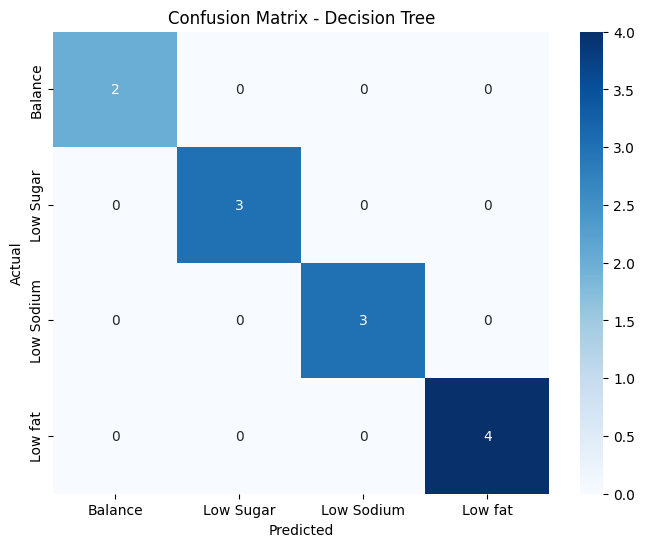

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# สร้างแผนภาพ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Balance', 'Low Sugar', 'Low Sodium', 'Low fat'], yticklabels=['Balance', 'Low Sugar', 'Low Sodium', 'Low fat'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

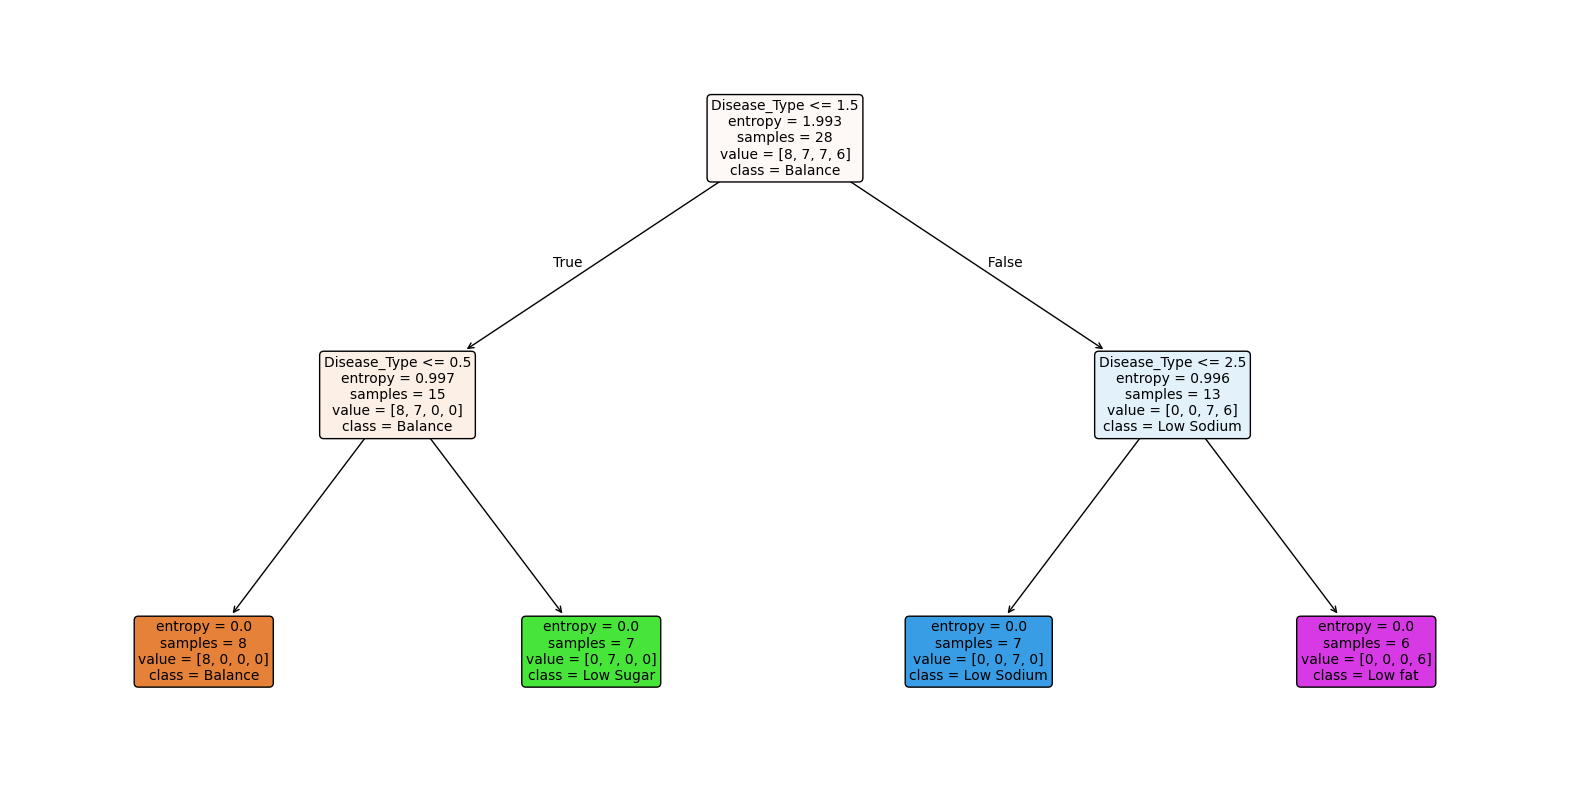

In [11]:
# Import library สำหรับการสร้างภาพ
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# สร้างภาพ Decision Tree
plt.figure(figsize=(20, 10))  # ตั้งค่าขนาดของภาพ
plot_tree(
    clf, 
    feature_names=['Ages', 'Gender', 'Height','Weight','Bmi', 'Disease_Type','Activity_Level'],  # ชื่อฟีเจอร์
    class_names=['Balance', 'Low Sugar', 'Low Sodium', 'Low fat'],  # ชื่อคลาส
    filled=True,  # เติมสีให้ node
    rounded=True,  # ใช้ node แบบโค้งมน
    fontsize=10  # ขนาดตัวอักษร
)

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
# ===============================
# รับ Input
# ===============================
print("\n🎯 กรุณากรอกข้อมูลสุขภาพของคุณ 🎯")


age = int(input("📌 อายุของคุณ: "))

# เลือกเพศ
print("📌 เลือกเพศของคุณ:")
print("   1. ชาย")
print("   2. หญิง")
gender_choice = int(input("กรุณาเลือกหมายเลขที่ตรงกับเพศของคุณ: "))
if gender_choice == 1:
    gender = "ชาย"
elif gender_choice == 2:
    gender = "หญิง"
else:
    print("เลือกไม่ถูกต้อง, กำหนดเป็น ชาย โดยค่าเริ่มต้น")
    gender = "ชาย"

# รับส่วนสูงและน้ำหนัก พร้อมคำนวณ BMI
height = float(input("📌 ส่วนสูง (cm): "))
weight = float(input("📌 น้ำหนัก (kg): "))
bmi = weight / ((height / 100) ** 2)
if bmi < 18.50:
    status_bmi = "น้ำหนักต่ำกว่าเกณฑ์"
elif bmi < 23.00:
    status_bmi = "น้ำหนักสมส่วน"
elif bmi < 25.00:
    status_bmi = "น้ำหนักเกินเกณฑ์"
else:
    status_bmi = "อ้วน"

# เลือกโรค
print("📌 คุณมีโรคประจำตัวหรือไม่:")
print("   1. ไม่มีโรค")
print("   2. โรคเบาหวาน")
print("   3. โรคความดันโลหิตสูง")
print("   4. โรคหัวใจ")
disease_choice = int(input("กรุณาเลือกหมายเลขที่ตรงกับโรคของคุณ: "))
if disease_choice == 1:
    disease = "ไม่มีโรค"
elif disease_choice == 2:
    disease = "โรคเบาหวาน"
elif disease_choice == 3:
    disease = "โรคความดันโลหิตสูง"
elif disease_choice == 4:
    disease = "โรคหัวใจ"
else:
    print("เลือกไม่ถูกต้อง, กำหนดเป็น ไม่มีโรค โดยค่าเริ่มต้น")
    disease = "ไม่มีโรค"

# เลือกระดับกิจกรรม
print("📌 เลือกระดับกิจกรรมของคุณ:")
print("   1. น้อย")
print("   2. ปานกลาง")
print("   3. มาก")
activity_choice = int(input("กรุณาเลือกหมายเลขที่ตรงกับระดับกิจกรรมของคุณ: "))
if activity_choice == 1:
    activity = "น้อย"
elif activity_choice == 2:
    activity = "ปานกลาง"
elif activity_choice == 3:
    activity = "มาก"
else:
    print("เลือกไม่ถูกต้อง, กำหนดเป็น น้อย โดยค่าเริ่มต้น")
    activity = "น้อย"

# คำนวณพลังงาน
if gender == "ชาย":
    bmr = 66 + (13.7 * weight) + (5 * height) - (6.8 * age)
    if activity == "น้อย":
        daily_calorie = bmr * 1.375
    elif activity == "ปานกลาง": 
        daily_calorie = bmr * 1.55
    elif activity == "มาก": 
        daily_calorie = bmr * 1.7
elif gender == "หญิง":
    bmr = 655 + (9.6 * weight) + (1.8 * height) - (4.7 * age)
    if activity == "น้อย": 
        daily_calorie = bmr * 1.375
    elif activity == "ปานกลาง": 
        daily_calorie = bmr * 1.55
    elif activity == "มาก":
        daily_calorie = bmr * 1.7


# แปลงค่าตัวแปร Gender
if gender == "ชาย":
    gender_encoded = 1
elif gender == "หญิง":
    gender_encoded = 2
else:
    gender_encoded = 1  # กำหนดค่าเริ่มต้นเป็น "ชาย"

# แปลงค่าตัวแปร Disease
if disease == "ไม่มีโรค":
    disease_encoded = 0
elif disease == "โรคเบาหวาน":
    disease_encoded = 1
elif disease == "โรคความดันโลหิตสูง":
    disease_encoded = 2
elif disease == "โรคหัวใจ":
    disease_encoded = 3
else:
    disease_encoded = 0  # กำหนดค่าเริ่มต้นเป็น "ไม่มีโรค"

# แปลงค่าตัวแปร Activity_Level
if activity == "น้อย":
    activity_encoded = 1
elif activity == "ปานกลาง":
    activity_encoded = 2
elif activity == "มาก":
    activity_encoded = 3
else:
    activity_encoded = 1  # กำหนดค่าเริ่มต้นเป็น "น้อย"


# สร้างข้อมูล
new_user = pd.DataFrame({
    "Ages": [age],
    "Gender": [gender_encoded],
    "Height": [height],
    "Weight": [weight],
    "Bmi": [bmi],
    "Disease_Type": [disease_encoded],
    "Activity_Level": [activity_encoded]
})

# ===============================
# ทำนาย+เเนะนำอาหาร
# ===============================


predicted_menu_code = clf.predict(new_user)[0]
# แสดงผลลัพธ์
print("รหัสที่ทำนาย:", predicted_menu_code)

# กรองอาหาร
recommended_foods = df_food[df_food["Food_Type"] == predicted_menu_code]

# แสดงข้อมูลที่กรอก
print('========================================')
print('\nข้อมูลสุขภาพของคุณ')
print('========================================')
print("คุณเป็นเพศ:", gender)
print("คุณอายุ:", age)
print("คุณสูง:", height, "ซม.")
print("คุณน้ำหนัก:", weight, "กก.")
print(f"BMI ของคุณ: {bmi:.2f}")
print("สถานะ BMI :", status_bmi)
print("คุณมีโรค:", disease)
print("ระดับกิจกรรมของคุณ:", activity)
print(f"พลังงานที่คุณควรได้รับ/วัน: {int(daily_calorie)} กิโลแคลอรี")

print('========================================')
print("ประเภทอาหาร: 0 = อาหารสมดุล 1 = อาหารน้ำตาลต่ำ 2 = อาหารโซเดียมต่ำ 3 = อาหารไขมันต่ำ")
print('========================================')
print("\n🍽 เมนูที่เหมาะสมสำหรับคุณ:", predicted_menu_code)
print("✅ เมนูแนะนำ:")
for index, row in recommended_foods.iterrows():
    print(f"- {row['Food_Name']} (พลังงาน {row['Energy (kcal)']} kcal, โปรตีน {row['Protein (g)']}g, คาร์โบไฮเดรต {row['Carbohydrates (g)']}g, น้ำตาล {row['Sugars (g)']}g, ไขมัน {row['Fat (g)']}g, โซเดียม {row['Sodium (mg)']}mg)")





🎯 กรุณากรอกข้อมูลสุขภาพของคุณ 🎯
📌 เลือกเพศของคุณ:
   1. ชาย
   2. หญิง
📌 คุณมีโรคประจำตัวหรือไม่:
   1. ไม่มีโรค
   2. โรคเบาหวาน
   3. โรคความดันโลหิตสูง
   4. โรคหัวใจ
📌 เลือกระดับกิจกรรมของคุณ:
   1. น้อย
   2. ปานกลาง
   3. มาก
รหัสที่ทำนาย: 0

ข้อมูลสุขภาพของคุณ
คุณเป็นเพศ: ชาย
คุณอายุ: 21
คุณสูง: 175.0 ซม.
คุณน้ำหนัก: 56.0 กก.
BMI ของคุณ: 18.29
สถานะ BMI : น้ำหนักต่ำกว่าเกณฑ์
คุณมีโรค: ไม่มีโรค
ระดับกิจกรรมของคุณ: ปานกลาง
พลังงานที่คุณควรได้รับ/วัน: 2426 กิโลแคลอรี
ประเภทอาหาร: 0 = อาหารสมดุล 1 = อาหารน้ำตาลต่ำ 2 = อาหารโซเดียมต่ำ 3 = อาหารไขมันต่ำ

🍽 เมนูที่เหมาะสมสำหรับคุณ: 0
✅ เมนูแนะนำ:
- กล้วยไข่ (พลังงาน 107 kcal, โปรตีน 1.35g, คาร์โบไฮเดรต 24.3g, น้ำตาล 21.5g, ไขมัน 0.11g, โซเดียม 22.0mg)
- กล้วยน้ำว้า (พลังงาน 118 kcal, โปรตีน 0.78g, คาร์โบไฮเดรต 27.18g, น้ำตาล 18.47g, ไขมัน 0.15g, โซเดียม 4.0mg)
- ขนุน (พลังงาน 101 kcal, โปรตีน 1.55g, คาร์โบไฮเดรต 21.73g, น้ำตาล 19.17g, ไขมัน 0.42g, โซเดียม 26.0mg)
- เงาะ (พลังงาน 77 kcal, โปรตีน 0.97g, คาร์โบไฮเดรต 17.92g, น้ำตาล 0.0g,

In [13]:
breakfast_calories = daily_calorie * 0.3  # เช้า 30% 
lunch_calories = daily_calorie * 0.4    # กลางวัน 40% 
dinner_calories = daily_calorie * 0.3   # เย็น 30% 

def create_meal_set(df_food, meal_type, max_calories, food_type, max_attempts=50):
    attempt = 0
    while attempt < max_attempts:
        # กรองอาหารตามประเภทที่แนะนำ
        filtered_food = df_food[df_food['Food_Type'] == food_type]

        # อาหารหลัก
        main_dish = filtered_food[filtered_food['Category'] == 'อาหารจานหลัก']
        fruit = filtered_food[filtered_food['Category'] == 'ผลไม้']
        dessert = filtered_food[filtered_food['Category'] == 'ขนม']

        # เลือก
        fast_food = filtered_food[filtered_food['Category'] == 'ฟาสต์ฟู้ด']
        drink = filtered_food[filtered_food['Category'] == 'เครื่องดื่ม']

        # สุ่มอาหาร
        selected_main = main_dish.sample(n=1) if not main_dish.empty else (fast_food.sample(n=1) if not fast_food.empty else pd.DataFrame())
        selected_fruit = fruit.sample(n=1) if not fruit.empty else (drink.sample(n=1) if not drink.empty else pd.DataFrame())
        selected_dessert = dessert.sample(n=1) if not dessert.empty else (
            fast_food.sample(n=1) if not fast_food.empty else
            drink.sample(n=1) if not drink.empty else pd.DataFrame()
        )
        # จัดเซ็ท
        # meal_set = pd.concat([main_dish, fruit, dessert, drink, fast_food])
        # meal_set = pd.concat([main_dish, fruit, dessert])
        meal_set = pd.concat([selected_main, selected_fruit, selected_dessert])


        # ตรวจสอบว่าอาหารไม่เกินพลังงานที่กำหนด
        total_calories = meal_set['Energy (kcal)'].sum()
        if total_calories <= max_calories:
            return meal_set

        attempt += 1  # เพิ่มจำนวนครั้ง

    print("Warning: Could not find a valid meal set after several attempts.")
    return meal_set  # ถ้าเลือกไม่ได้ ให้ส่งค่า Meal Set ที่พลังงานเกิน

# คัดกรองและเลือกชุดอาหารสำหรับมื้อเช้า, กลางวัน, เย็น โดยใช้ประเภทที่ทำนาย
breakfast_meal_set = create_meal_set(df_food, "breakfast", breakfast_calories, predicted_menu_code)
lunch_meal_set = create_meal_set(df_food, "lunch", lunch_calories, predicted_menu_code)
dinner_meal_set = create_meal_set(df_food, "dinner", dinner_calories, predicted_menu_code)

# พลังงานรวมเเต่ละมื้อ
total_breakfast_calories = breakfast_meal_set['Energy (kcal)'].sum()
total_lunch_calories = lunch_meal_set['Energy (kcal)'].sum()
total_dinner_calories = dinner_meal_set['Energy (kcal)'].sum()

# แสดงผล
print('\n========================================')
print("เมนูมื้อเช้าที่แนะนำ (พลังงานไม่เกิน {:.2f} kcal):".format(breakfast_calories))
for index, row in breakfast_meal_set.iterrows():
    print(f"- {row['Food_Name']} (พลังงาน {row['Energy (kcal)']} kcal)")
print(f"\n มื้อเช้าทานไปทั้งหมด {total_breakfast_calories:.2f} kcal")


print("\nเมนูมื้อกลางวันที่แนะนำ (พลังงานไม่เกิน {:.2f} kcal):".format(lunch_calories))
for index, row in lunch_meal_set.iterrows():
    print(f"- {row['Food_Name']} (พลังงาน {row['Energy (kcal)']} kcal)")
print(f"\n มื้อกลางวันทานไปทั้งหมด {total_lunch_calories:.2f} kcal")


print("\nเมนูมื้อเย็นที่แนะนำ (พลังงานไม่เกิน {:.2f} kcal):".format(dinner_calories))
for index, row in dinner_meal_set.iterrows():
    print(f"- {row['Food_Name']} (พลังงาน {row['Energy (kcal)']} kcal)" )
print(f"\n มื้อเย็นทานไปทั้งหมด {total_dinner_calories:.2f} kcal")

# รวมพลังงานทั้งหมดของมื้อที่แนะนำเพื่อดูว่ามีพลังงานไม่เกินที่กำหนด
total_recommended_calories = breakfast_meal_set['Energy (kcal)'].sum() + lunch_meal_set['Energy (kcal)'].sum() + dinner_meal_set['Energy (kcal)'].sum()

print('\n========================================')
print(f"พลังงานทั้งหมดที่ทานไปวันนี้: {total_recommended_calories:.2f} kcal (ไม่เกิน {int(daily_calorie)} kcal/วัน)") 



เมนูมื้อเช้าที่แนะนำ (พลังงานไม่เกิน 727.91 kcal):
- ข้าวราดแกงเขียวหวานไก่ (พลังงาน 340 kcal)
- องุ่น (พลังงาน 51 kcal)
- ขนมปัง, หน้าเนย (พลังงาน 310 kcal)

 มื้อเช้าทานไปทั้งหมด 701.00 kcal

เมนูมื้อกลางวันที่แนะนำ (พลังงานไม่เกิน 970.55 kcal):
- ก๋วยเตี๋ยวเส้นบะหมี่หมูแดง น้ำ (พลังงาน 170 kcal)
- มังคุด (พลังงาน 77 kcal)
- ครัวซอง (พลังงาน 406 kcal)

 มื้อกลางวันทานไปทั้งหมด 653.00 kcal

เมนูมื้อเย็นที่แนะนำ (พลังงานไม่เกิน 727.91 kcal):
- ข้าวราดแกงเขียวหวานไก่ (พลังงาน 340 kcal)
- ทุเรียน (พลังงาน 140 kcal)
- ข้าวเหนียวหน้าสังขยา (พลังงาน 199 kcal)

 มื้อเย็นทานไปทั้งหมด 679.00 kcal

พลังงานทั้งหมดที่ทานไปวันนี้: 2033.00 kcal (ไม่เกิน 2426 kcal/วัน)


In [14]:
import joblib

# บันทึกโมเดล
joblib.dump(clf, 'food_recommendation_model.pkl')
print("\n🎉 บันทึกโมเดลสำเร็จ! (food_recommendation_model.pkl)")


🎉 บันทึกโมเดลสำเร็จ! (food_recommendation_model.pkl)
